## **Практическое задание №8.**
## **Применение методов машинного обучения.**

Задание 1. Для выбранного и предобработанного датасета из лабораторной работы 1, учитывая особенности моделей:

Произвести классификацию используя:
1. Наивный баессовский классификатор
2. Метод k-ближайших соседей
3.  Метод опорных векторов
4. Деревья решений и случайные леса

1.1 Наивный гауссовский классификатор



In [59]:
import pandas as pd
import numpy as np
%matplotlib inline

# Загружаем библиотеки
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
# Загрузить данные
wine = datasets.load_wine()
features = wine.data 
target = wine.target
# Создать объект наивного гауссовского классификатора 
clf = GaussianNB()
# Натренировать модель
model = clf.fit(features, target)
print(clf.predict(features[2:3]))


[0]


тренируем Наивный гауссовский классификатор, используя метод fit

In [60]:
# Создать новое наблюдение 
new_observation = [[ 0, 4, 0, 0.4,4,4,4,4,0.4,0.4,4,4,4]]

Делаем предсказание о классе наблюдений

In [61]:
# Предсказать класс
model.predict(new_observation)

array([1])

In [62]:
print("Правильность на тесте: {:.2f}".format(clf.score(features, target)))

Правильность на тесте: 0.99


In [63]:
# Создаем объект гауссового классификатора с априорными вероятностями
сlf = GaussianNB(priors=[0.25, 0.25, 0.5])
# Натренировать модель
model = clf.fit(features, target)
print(clf.predict(features[2:3]))

[0]


1.2 Метод k-средних


In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

Cгенерируем двумерный набор данных, содержащий четыре отдельных «пятна». 

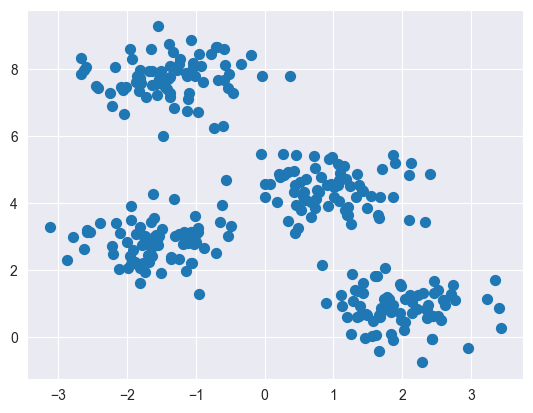

In [65]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

Реализация метода k средних используя алгоритм приведенный выше с максимизацией М.О.

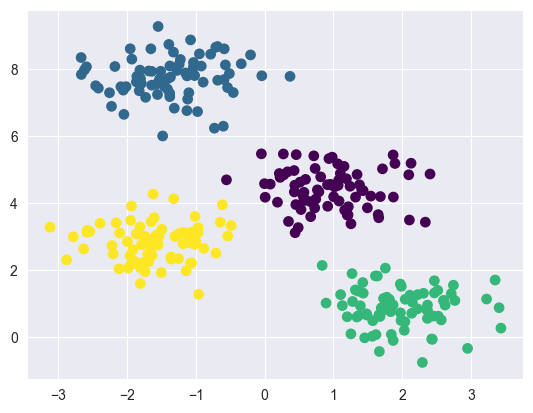

In [66]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)# 1. Выбираем кластеры случайным образом
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers) # 2a. Присваиваем метки в соответствии с ближайшим центром
        new_centers = np.array([X[labels == i].mean(0) # 2b. Находим новые центры, исходя из средних значений точек
                                      for i in range(n_clusters)]) # 2c. Проверяем сходимость
        if np.all(centers == new_centers):
             break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X, 4) #Количество кластеров следует выбирать заранее.
plt.scatter(X[:, 0], X[:, 1], c=labels, s=45, cmap='viridis')

Кластеризация немаркированных данных может быть выполнена с помощью модуля sklearn.cluster.
Метод k средних реализован в классе sklearn.cluster.KMeans
Подробнее о задании параметров https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

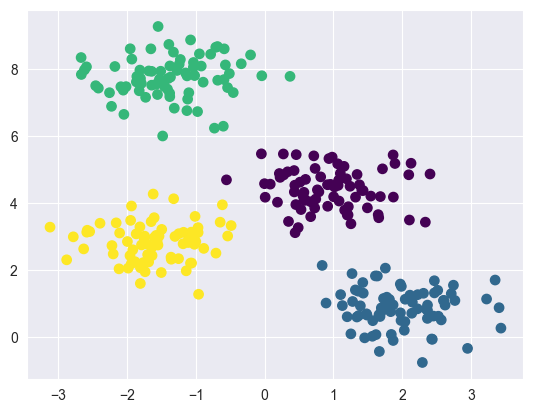

In [67]:
from sklearn.cluster import KMeans

labels = KMeans(4, random_state=0, n_init=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=45, cmap='viridis')

1.3  МЕТОД ОПОРНЫХ ВЕКТОРОВ


In [68]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Загрузить библиотеки - тренировка классификатора
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

# Загрузить данные всего с двумя классами и двумя признаками 
iris = datasets.load_iris()
features = iris.data[:300,:2] 
target = iris.target[:300]
# Стнадартизировать признаки 
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Создать опорно-векторный классификатор 
svc = LinearSVC(C=1.0)
# Натренировать модель
model = svc.fit(features_standardized, target)

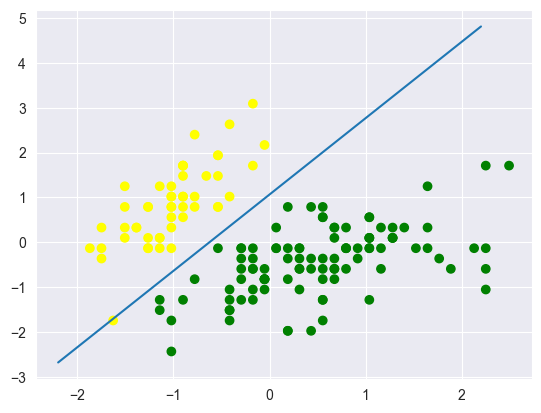

In [70]:
# Загрузить библиотеку
from matplotlib import pyplot as pit


# Вывести точки данных на график и расцветить, используя их класс 
color = ["yellow" if C == 0 else "green" for C in target]
pit.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Создать гиперплоскость 
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.2, 2.2)
yy = a * xx-(svc.intercept_[0]) / w[1]

# Начертить гиперплоскость 
pit.plot(xx, yy)
pit. show ()

Требуется натренировать опорно-векторный классификатор.

In [71]:
# Загрузить библиотеки 
from sklearn.svm import SVC
import numpy as np
# Задать начальное значение рандомизации 
np.random.seed(0)
# Сгенерировать два признака 
features = np.random.randn(200, 2)
# Cгенерируем линейно разделимые классы
target_xor = np.logical_xor(features[:, 0] > 0 , features[:, 1] > 0 ) 
target = np.where(target_xor, 0, 1)

# Создать опорно-векторную машину  с радиально-базисным функциональным ядром (RBF-ядром) 
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Натренировать классификатор 
model = svc.fit(features, target)

In [72]:
# Выведем на график наблюдения и гиперплоскость границы решения 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Отображение границ решений
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)

    # Отображение точек
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=cmap(idx), label=cl)



Создадим классификатор опорно-векторной машины с линейным ядром:

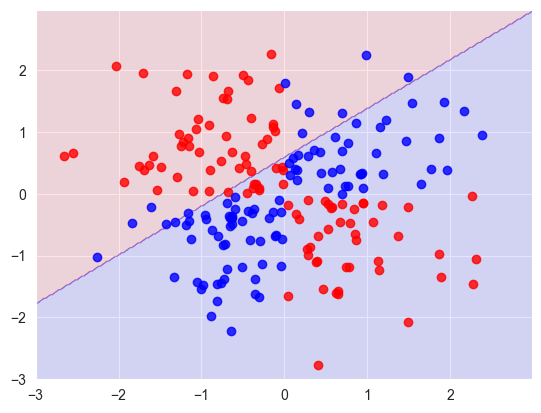

In [89]:
# Создать опорно-векторный классификатор с линейным ядром 
svc_linear = SVC(kernel="linear", random_state=0, C=1)
# Натренируем модель 
svc_linear.fit(features, target)
SVC(C=1, cache_size=250, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear', max_iter=-1, probability=False, random_state=0, shrinking=True, 
tol=0.005, verbose=False)

plot_decision_regions(features, target, classifier=svc_linear) 
pit.show()


In [90]:
# Создать опорно-векторную машину с радиально-базисным функциональным ядром (RBF-ядром) 
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Натренировать классификатор 
model = svc.fit(features, target)

# Вывести на график наблюдения и гиперплоскость 
plot_decision_regions(features, target, classifier=svc) 
pit. show ()

InvalidParameterError: The 'kernel' parameter of SVC must be a str among {'precomputed', 'linear', 'poly', 'sigmoid', 'rbf'} or a callable. Got 'brf' instead.

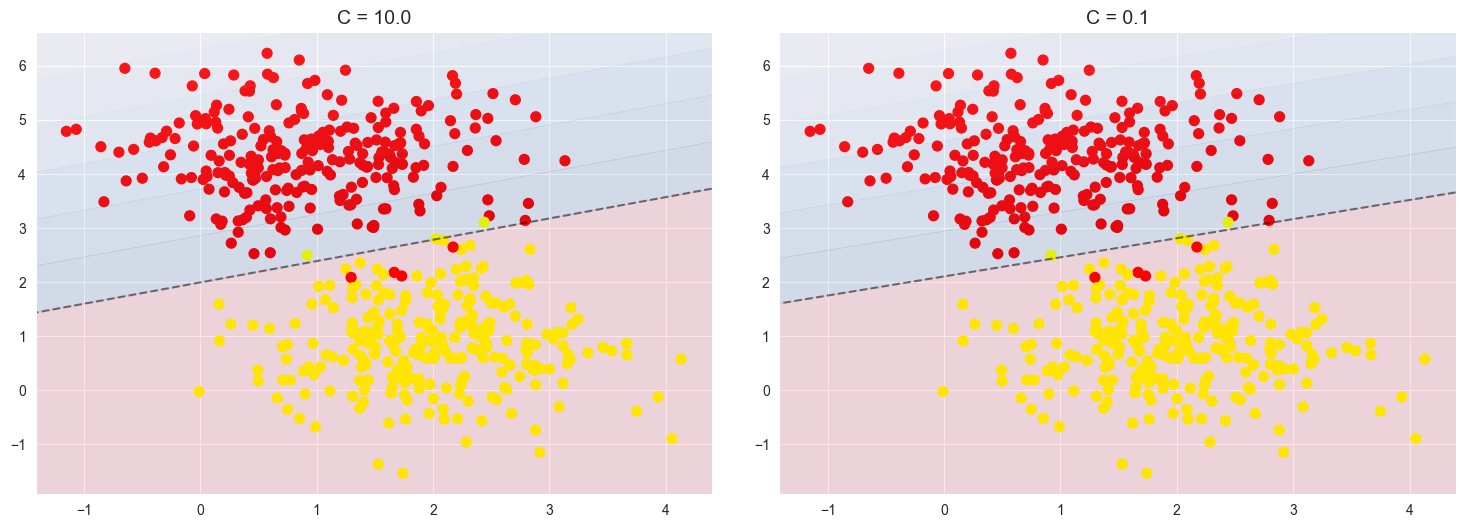

In [75]:
def plot_svc_decision_function(model, ax):
    """Функция для визуализации границ решений SVM."""
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Создаем сетку для предсказаний
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))

    # Предсказание для каждой точки в сетке
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Отображение границ решений
    ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles='--')
    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap='Blues', alpha=0.1)
    ax.contourf(xx, yy, Z, levels=[0, Z.max()], colors='red', alpha=0.1)


X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)


1.4 Деревья решений и случайные леса

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

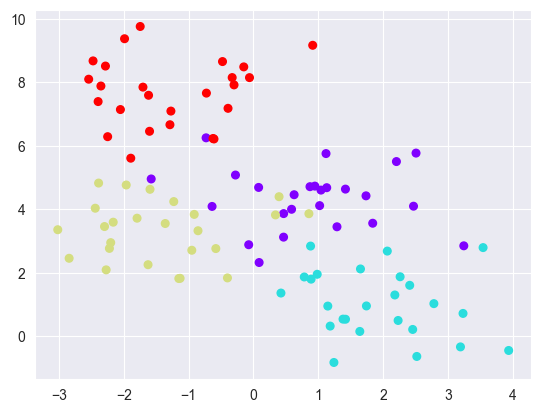

In [91]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow')

Простое дерево принятия решений для этих данных будет многократно разделять данные по одной или нескольким осям, в соответствии с определенным количественным критерием, и на каждом уровне маркировать новую область согласно большинству лежащих в ней точек. 
Процесс обучения дерева принятия решений на наших данных можно выполнить в Scikit-Learn с помощью оценивателя DecisionTreeClassifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

Функция, облегчающая визуализацию вывода классификатора

In [79]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Рисуем обучающие точки
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap=cmap, zorder=3)
    ax.axis('tight')
    ax.axis('off')

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Обучаем модель
    model.fit(X, y)

    # Создаем сетку для предсказаний
    xx, yy = np.meshgrid(np.linspace(*xlim, num=250), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Создаем цветной график с результатами
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, vmin=y.min(), vmax=y.max(), zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Визуализируем результаты классификации на основе дерева принятия решений из примера

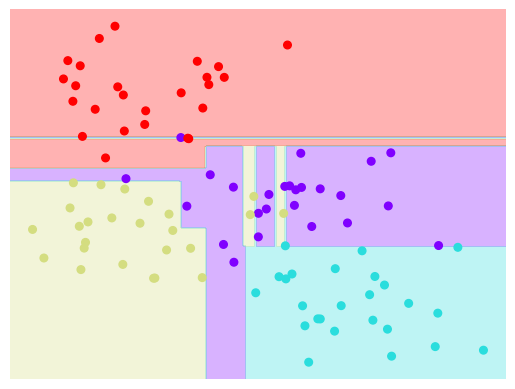

In [80]:
visualize_classifier(DecisionTreeClassifier(), X, y)

Случайные леса

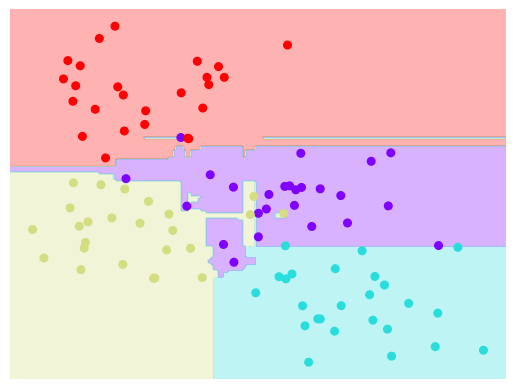

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=120, max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

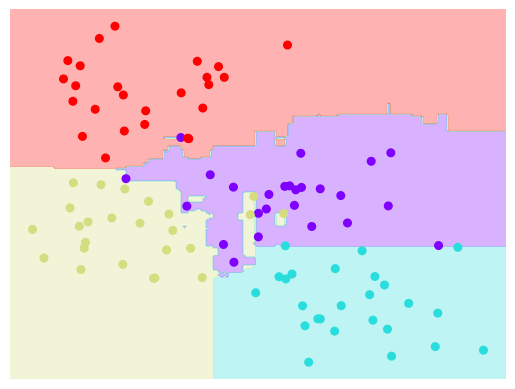

In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

## Задание 2. 
На наборе данных Boston Housing https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset сравнить работу алгоритмов линейной регрессии, гребневой регрессии (L2 -регуляризации), лассо-регрессии (L1 регуляризации )

In [83]:
#Загрузка данных
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

FileNotFoundError: [Errno 2] No such file or directory: 'housing.csv'

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Разделение данных
X = data.drop('AGE', axis=1)  # Предполагается, что 'AGE' - целевая переменная
y = data['AGE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение моделей
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)  # Попробуйте разные значения alpha
lasso_reg = Lasso(alpha=1.0)  # Попробуйте разные значения alpha

linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Оценка результатов
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("MSE Linear Regression:", mse_linear)
print("MSE Ridge Regression:", mse_ridge)
print("MSE Lasso Regression:", mse_lasso)


MSE Linear Regression: 243.2291655951603
MSE Ridge Regression: 253.41392335062469
MSE Lasso Regression: 275.7488161823435


## Задание 3.
 Используя небор данных Breast Cancer Wisconsin (Diagnostic) Dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data  сравнить работу алгоритмов k-средних, DBSCAN и агломеративной кластеризации

In [38]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data = pd.read_csv('cancer.csv', header=None, names=column_names)
print(data.head())

                                                                                                                                                                                                                                                                                CRIM  \
id       diagnosis radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave points_mean symmetry_mean fractal_dimension_mean radius_se texture_se perimeter_se area_se smoothness_se compactness_se concavity_se  concave points_se   
842302   M         17.99       10.38        122.8          1001      0.1184          0.2776           0.3001         0.1471              0.2419        0.07871                1.095     0.9053     8.589        153.4   0.006399      0.04904        0.05373                 0.01587   
842517   M         20.57       17.77        132.9          1326      0.08474         0.07864          0.0869         0.07017             0.1812        0.05667  

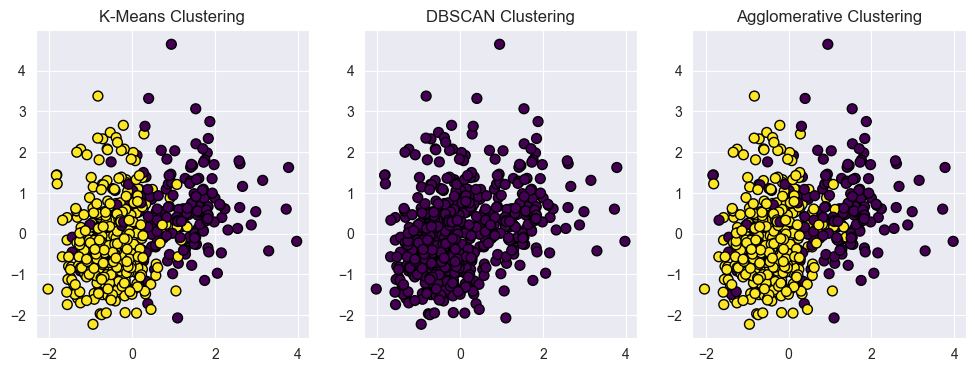

In [39]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Загрузка данных
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Определение кластеров с использованием k-средних
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Определение кластеров с использованием DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Определение кластеров с использованием агломеративной кластеризации
agg_cluster = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_cluster.fit_predict(X_scaled)

# Визуализация результатов
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('K-Means Clustering')

plt.subplot(132)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('DBSCAN Clustering')

plt.subplot(133)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Agglomerative Clustering')

plt.show()
